In [9]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
import torch

In [12]:
def show_roc(run, ids):
    for id in tqdm(ids):
        output = pd.read_csv(f'../wearsed/training/baseline_conv/output/{run}/test_preds_epoch_{id}.csv')
        y_true, y_pred = output['targets'], output['predictions']
        y_true[y_true == 2] = 1
        fpr, tpr, thresholds = roc_curve(y_true, y_pred)
        plt.plot(fpr, tpr, label=f'Epoch {id}')
    plt.plot([0,1], [0,1], color='green', linestyle='dashed', marker='o')
    plt.xlabel('False Positive Rate (1 - Specifity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.legend(loc='lower right')
    plt.title(run)
    plt.show()

100%|██████████| 7/7 [00:56<00:00,  8.11s/it]
/homes/jwuelfingen/miniconda3/envs/master/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


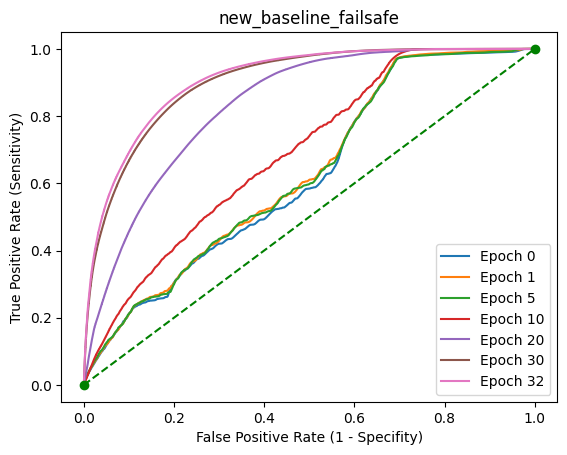

In [11]:
show_roc('new_baseline_failsafe', [0, 1, 5, 10, 20, 30, 32])